
>> ANAMOLY DETECTION - ELECTRICITY CONSUMPTION - CLASSIFICATION APPROACH

>> Code written in Databricks. Titles that were provided for every command cell is not compatible/displayable in this Jupyter Notebook. 

>> Provide Data Label based on Outliers observed in the dataset. The Data label that has been set based on the contextual outliers, is the Target variable. It says whether a data point (Energy consumed every 15 mins) is ‘anomalous’ or ‘not’. 

>> Construct a predictive model to “classify future data points”. We will make use of classification models and use the most optimized model to achieve the result.

>> Author: Vijay Kailash S 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df1 = pd.read_csv("/dbfs/FileStore/shared_uploads/vijaykailash.sankaranaray@wipro.com/1__Consumable_Energy_Surge_Detection_Data___Train-1.csv")
df1.shape

(35134, 4)

In [0]:
df1.head(10)

,Date Time,Electricity Consumed [kWh],Unnamed: 2,Unnamed: 3
0,01-01-16 00:15,2.85,NaN,NaN
1,01-01-16 00:30,2.85,NaN,NaN
2,01-01-16 00:45,3.00,NaN,NaN
3,01-01-16 01:00,2.94,NaN,NaN
4,01-01-16 01:15,2.79,NaN,NaN
5,01-01-16 01:30,2.79,NaN,NaN
6,01-01-16 01:45,2.70,NaN,NaN
7,01-01-16 02:00,2.73,NaN,NaN
8,01-01-16 02:15,2.67,NaN,NaN
9,01-01-16 02:30,2.73,NaN,NaN


In [0]:
df1.isna().sum()

Date Time                         0
Electricity Consumed [kWh]        0
Unnamed: 2                    35134
Unnamed: 3                    35134
dtype: int64

In [0]:
df1=df1.drop(['Unnamed: 2','Unnamed: 3'],axis=1)

In [0]:
df1.head()

,Date Time,Electricity Consumed [kWh]
0,01-01-16 00:15,2.85
1,01-01-16 00:30,2.85
2,01-01-16 00:45,3.00
3,01-01-16 01:00,2.94
4,01-01-16 01:15,2.79


In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35134 entries, 0 to 35133
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date Time                   35134 non-null  object 
 1   Electricity Consumed [kWh]  35134 non-null  float64
dtypes: float64(1), object(1)
memory usage: 549.1+ KB


In [0]:
df1['Timestamp']=pd.to_datetime(df1['Date Time'])

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35134 entries, 0 to 35133
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date Time                   35134 non-null  object        
 1   Electricity Consumed [kWh]  35134 non-null  float64       
 2   Timestamp                   35134 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 823.6+ KB


In [0]:
df1.drop(['Date Time'],axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35134 entries, 0 to 35133
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Electricity Consumed [kWh]  35134 non-null  float64       
 1   Timestamp                   35134 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 549.1 KB


In [0]:
df1['day'] = pd.DatetimeIndex(df1['Timestamp']).day
df1['month'] = pd.DatetimeIndex(df1['Timestamp']).month
df1['hour'] = pd.DatetimeIndex(df1['Timestamp']).hour
df1['minute'] = pd.DatetimeIndex(df1['Timestamp']).minute
df1['weekofyear'] = pd.DatetimeIndex(df1['Timestamp']).weekofyear
# https://en.wikipedia.org/wiki/ISO_week_date#First_week
df1['dayofweek'] = pd.DatetimeIndex(df1['Timestamp']).dayofweek
df1['quarter'] = pd.DatetimeIndex(df1['Timestamp']).quarter
df1['monthstart'] = pd.DatetimeIndex(df1['Timestamp']).is_month_start
df1['monthend'] = pd.DatetimeIndex(df1['Timestamp']).is_month_end

<command-1406865997099776>:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df1['weekofyear'] = pd.DatetimeIndex(df1['Timestamp']).weekofyear


In [0]:
df1.monthstart = df1.monthstart.replace({True: 1, False: 0})
df1.monthend = df1.monthend.replace({True: 1, False: 0})
df1

,Electricity Consumed [kWh],Timestamp,day,month,hour,minute,weekofyear,dayofweek,quarter,monthstart,monthend
0,2.85,2016-01-01 00:15:00,1,1,0,15,53,4,1,1,0
1,2.85,2016-01-01 00:30:00,1,1,0,30,53,4,1,1,0
2,3.00,2016-01-01 00:45:00,1,1,0,45,53,4,1,1,0
3,2.94,2016-01-01 01:00:00,1,1,1,0,53,4,1,1,0
4,2.79,2016-01-01 01:15:00,1,1,1,15,53,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
35129,2.43,2016-12-31 22:45:00,31,12,22,45,52,5,4,0,1
35130,2.43,2016-12-31 23:00:00,31,12,23,0,52,5,4,0,1
35131,2.40,2016-12-31 23:15:00,31,12,23,15,52,5,4,0,1
35132,2.43,2016-12-31 23:30:00,31,12,23,30,52,5,4,0,1


In [0]:
# Categorize the energy consumption based on weekday and weekend.
#1 Check for energy consumption on weekday.
#2 Check for energy consumption on weekend.

In [0]:
df1['weekend']=np.zeros(len(df1))
df1['weekend'] = df1['weekend'].astype('int64')

df1['weekend'][(df1['dayofweek']==5)|(df1['dayofweek']==6)]=1

<command-1406865997099779>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weekend'][(df1['dayofweek']==5)|(df1['dayofweek']==6)]=1


In [0]:
#pip install holidays
#import datetime as dt
#import holidays

# get holiday calender
# for date,name in sorted(holidays.IND(years=2016).items()):
#   print(date,name)

#df1['holiday']=np.zeros(len(df1))
#df1['holiday'] = df1['holiday'].astype('int64')

#df1['holiday'][(df1['Timestamp']=='2016-01-14')|(df1['Timestamp']=='2016-01-26')|
#(df1['Timestamp']=='2016-03-20')|(df1['Timestamp']=='2016-03-24')|
#(df1['Timestamp']=='2016-03-25')|(df1['Timestamp']=='2016-03-27')|
#(df1['Timestamp']=='2016-05-01')|(df1['Timestamp']=='2016-05-15')|
#(df1['Timestamp']=='2016-07-07')|(df1['Timestamp']=='2016-08-15')|
#(df1['Timestamp']=='2016-09-11')|(df1['Timestamp']=='2016-10-02')|
#(df1['Timestamp']=='2016-10-11')|(df1['Timestamp']=='2016-10-30')|
#(df1['Timestamp']=='2016-12-11')|(df1['Timestamp']=='2016-12-25')]=1

In [0]:
df1.head(10)

,Electricity Consumed [kWh],Timestamp,day,month,hour,minute,weekofyear,dayofweek,quarter,monthstart,monthend,weekend
0,2.85,2016-01-01 00:15:00,1,1,0,15,53,4,1,1,0,0
1,2.85,2016-01-01 00:30:00,1,1,0,30,53,4,1,1,0,0
2,3.00,2016-01-01 00:45:00,1,1,0,45,53,4,1,1,0,0
3,2.94,2016-01-01 01:00:00,1,1,1,0,53,4,1,1,0,0
4,2.79,2016-01-01 01:15:00,1,1,1,15,53,4,1,1,0,0
5,2.79,2016-01-01 01:30:00,1,1,1,30,53,4,1,1,0,0
6,2.70,2016-01-01 01:45:00,1,1,1,45,53,4,1,1,0,0
7,2.73,2016-01-01 02:00:00,1,1,2,0,53,4,1,1,0,0
8,2.67,2016-01-01 02:15:00,1,1,2,15,53,4,1,1,0,0
9,2.73,2016-01-01 02:30:00,1,1,2,30,53,4,1,1,0,0


In [0]:
mean=df1['Electricity Consumed [kWh]'].mean()
print("mean:",mean)
median=df1['Electricity Consumed [kWh]'].median()
print("median:",median)

mean: 4.138484374110548
median: 3.3


/databricks/python/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


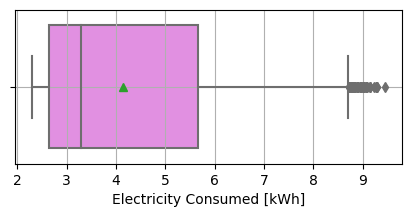

In [0]:
cols=['Electricity Consumed [kWh]']
fig,ax = plt.subplots(figsize=(5,2))
for i in cols:
    sns.boxplot(df1[i],showmeans=True,whis=1.0,color='violet',ax=ax)
    plt.grid()
    plt.show()

In [0]:
df1['Electricity Consumed [kWh]'].describe()

count    35134.000000
mean         4.138484
std          1.800963
min          2.310000
25%          2.640000
50%          3.300000
75%          5.670000
max          9.450000
Name: Electricity Consumed [kWh], dtype: float64

In [0]:
Overall_Consumption_Q1 = df1['Electricity Consumed [kWh]'].quantile(0.25) # Getting First quantile for all numerical variables
Overall_Consumption_Q3 = df1['Electricity Consumed [kWh]'].quantile(0.75) # Getting Second quantile for all numerical variables
Overall_Consumption_IQR = Overall_Consumption_Q3 - Overall_Consumption_Q1          # Getting IQR values
lower_range= Overall_Consumption_Q1-(1.5 * Overall_Consumption_IQR) #Getting Lower Limit for all numerical variables
upper_range= Overall_Consumption_Q3+(1.5 * Overall_Consumption_IQR) #Getting Upper Limit for all numerical variables
print('Overall_Consumption_Q1: 25% of observations recorded is lesser than: ',Overall_Consumption_Q1, 'kWh')
print('Overall_Consumption_Q3: 25% of observations recorded is greater than: ',Overall_Consumption_Q3, 'kWh')
print('Overall_Consumption_IQR: (Q3-Q1)',Overall_Consumption_IQR, 'kWh')
print('lower_range:',lower_range)
print('upper_range:',upper_range)

Overall_Consumption_Q1: 25% of observations recorded is lesser than:  2.64 kWh
Overall_Consumption_Q3: 25% of observations recorded is greater than:  5.67 kWh
Overall_Consumption_IQR: (Q3-Q1) 3.03 kWh
lower_range: -1.9049999999999998
upper_range: 10.215


In [0]:
weekend_df=df1.loc[(df1['weekend'] == 1)]
weekday_df=df1.loc[(df1['weekend'] == 0)]

#set index for further analysis
weekend_df= weekend_df.set_index('Timestamp')
weekday_df=weekday_df.set_index('Timestamp')
df1 = df1.set_index('Timestamp')

/databricks/python/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


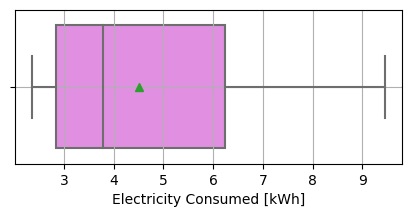

In [0]:
fig,ax = plt.subplots(figsize=(5,2))
for i in cols:
    sns.boxplot(weekday_df[i],showmeans=True,whis=1.0,color='violet',ax=ax)
    plt.grid()
    plt.show()

In [0]:
weekday_df['Electricity Consumed [kWh]'].describe()

count    25054.000000
mean         4.513446
std          1.834341
min          2.370000
25%          2.850000
50%          3.780000
75%          6.240000
max          9.450000
Name: Electricity Consumed [kWh], dtype: float64

In [0]:
Weekday_Consumption_Q1 = weekday_df['Electricity Consumed [kWh]'].quantile(0.25) # Getting First quantile for all numerical variables
Weekday_Consumption_Q3 = weekday_df['Electricity Consumed [kWh]'].quantile(0.75) # Getting Second quantile for all numerical variables
Weekday_Consumption_IQR = Weekday_Consumption_Q3 - Weekday_Consumption_Q1          # Getting IQR values
lower_range= Weekday_Consumption_Q1-(1.5 * Weekday_Consumption_IQR) #Getting Lower Limit for all numerical variables
upper_range= Weekday_Consumption_Q3+(1.5 * Weekday_Consumption_IQR) #Getting Upper Limit for all numerical variables
print('Weekday_Consumption_Q1: 25% of observations recorded is lesser than: ',Weekday_Consumption_Q1, 'kWh')
print('Weekday_Consumption_Q3: 25% of observations recorded is greater than: ',Weekday_Consumption_Q3, 'kWh')
print('Weekday_Consumption_IQR: (Q3-Q1)',Weekday_Consumption_IQR, 'kWh')
print('lower_range:',lower_range)
print('upper_range:',upper_range)

Weekday_Consumption_Q1: 25% of observations recorded is lesser than:  2.85 kWh
Weekday_Consumption_Q3: 25% of observations recorded is greater than:  6.24 kWh
Weekday_Consumption_IQR: (Q3-Q1) 3.39 kWh
lower_range: -2.235
upper_range: 11.325


/databricks/python/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


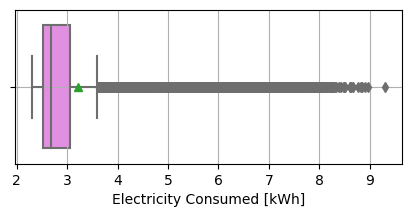

In [0]:
fig,ax = plt.subplots(figsize=(5,2))
for i in cols:
    sns.boxplot(weekend_df[i],showmeans=True,whis=1.0,color='violet',ax=ax)
    plt.grid()
    plt.show()

In [0]:
weekend_df['Electricity Consumed [kWh]'].describe()

count    10080.000000
mean         3.206512
std          1.313023
min          2.310000
25%          2.520000
50%          2.670000
75%          3.060000
max          9.300000
Name: Electricity Consumed [kWh], dtype: float64

In [0]:
Weekend_Consumption_Q1 = weekend_df['Electricity Consumed [kWh]'].quantile(0.25) # Getting First quantile for all numerical variables
Weekend_Consumption_Q3 = weekend_df['Electricity Consumed [kWh]'].quantile(0.75) # Getting Second quantile for all numerical variables
Weekend_Consumption_IQR = (Weekend_Consumption_Q3) - (Weekend_Consumption_Q1)         # Getting IQR values
lower_range= Weekend_Consumption_Q1-(1.5 * Weekend_Consumption_IQR) #Getting Lower Limit for all numerical variables
upper_range= Weekend_Consumption_Q3+(1.5 * Weekend_Consumption_IQR) #Getting Upper Limit for all numerical variables
print('Weekend_Consumption_Q1: 25% of observations recorded is lesser than: ',Weekend_Consumption_Q1, 'kWh')
print('Weekend_Consumption_Q3: 25% of observations recorded is greater than: ',Weekend_Consumption_Q3, 'kWh')
print('Weekend_Consumption_IQR: (Q3-Q1)',Weekend_Consumption_IQR, 'kWh')
print('lower_range:',lower_range)
print('upper_range:',upper_range)

Weekend_Consumption_Q1: 25% of observations recorded is lesser than:  2.52 kWh
Weekend_Consumption_Q3: 25% of observations recorded is greater than:  3.06 kWh
Weekend_Consumption_IQR: (Q3-Q1) 0.54 kWh
lower_range: 1.71
upper_range: 3.87


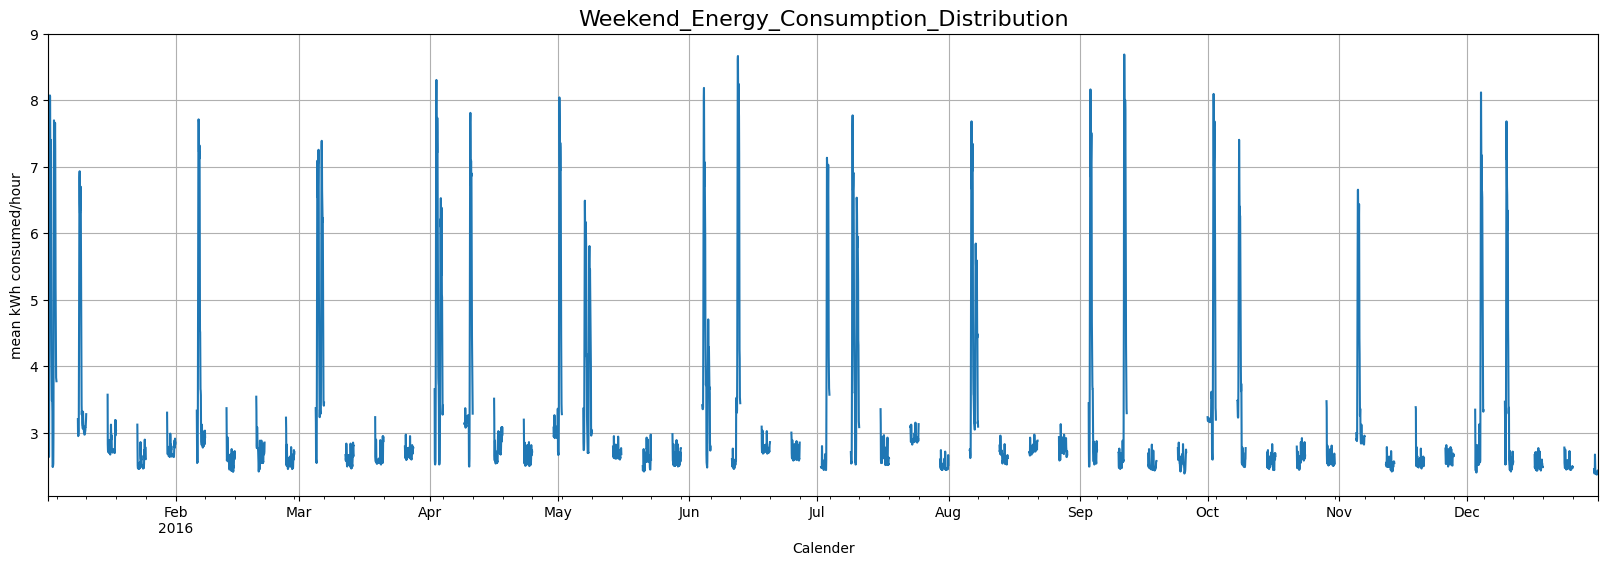

In [0]:
hourly_weekend_df = weekend_df['Electricity Consumed [kWh]'].resample('H').mean()
plt.figure()
weekend_hourly_figure = hourly_weekend_df.plot(figsize=(20,6))
plt.grid()
plt.title('Weekend_Energy_Consumption_Distribution',fontsize = 16)
plt.ylabel('mean kWh consumed/hour')
plt.xlabel('Calender')
plt.show()

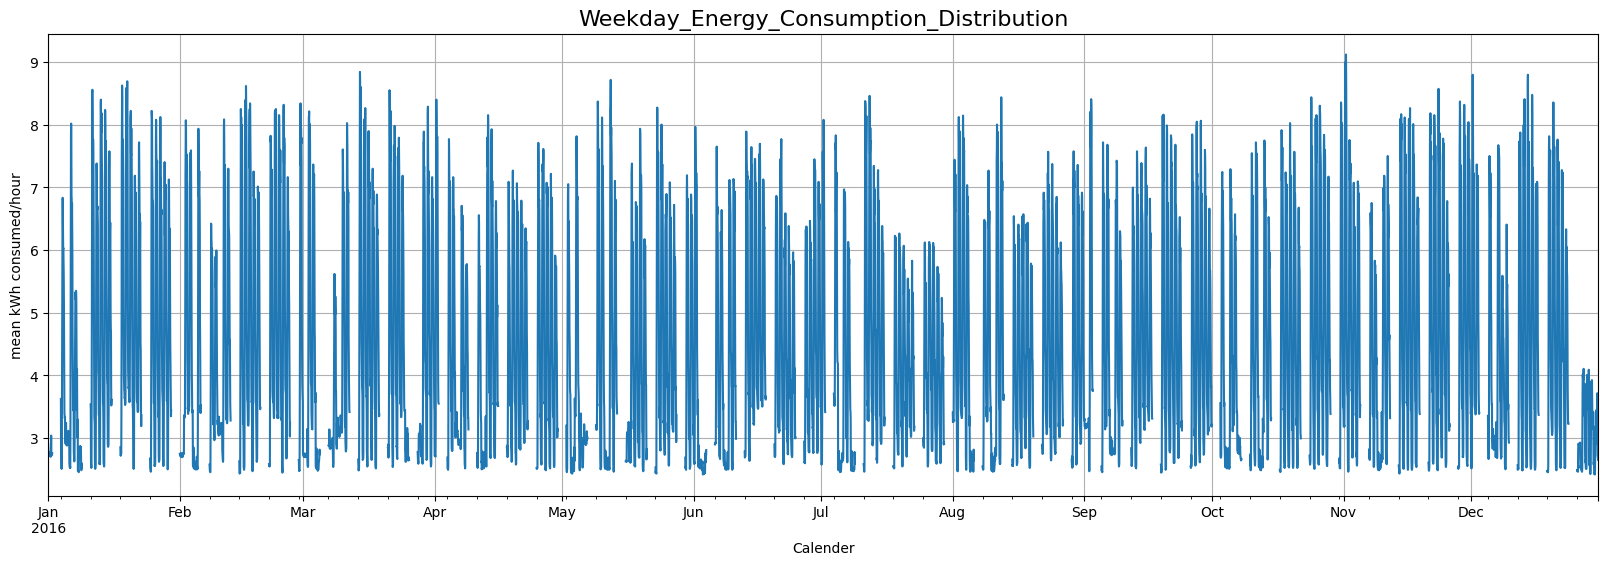

In [0]:
hourly_weekday_df = weekday_df['Electricity Consumed [kWh]'].resample('H').mean()
plt.figure()
weekday_hourly_figure = hourly_weekday_df.plot(figsize=(20,6))
plt.grid()
plt.title('Weekday_Energy_Consumption_Distribution',fontsize = 16)
plt.ylabel('mean kWh consumed/hour')
plt.xlabel('Calender')
plt.show()

In [0]:
df1['anamalous_consumption']=np.zeros(len(df1))
df1['anamalous_consumption'] = df1['anamalous_consumption'].astype('int64')

# Looking at the overall data distribution, 25% of  energy consumption > 5.67 kWh/every 15 mins.

# Also, there is a clear distinction on "energy consumption" between "weekdays" and "weekends"

# For "weekdays", 25% of energy consumption > 6.24 kWH/every 15 mins (max_value: 9.24 kWh). 

# For "weekends", 25% of energy consumption > 3.06 kWH/every 15 mins (max_value: 9.3 kWh). From "Weekend_Energy_Consumption_Distribution" chart, it is seen that "On first and second weekend of every month, the energy consumption is similar to weekday energy consumption" i.e On these days , It has crossed 75% percentile (of 3.06 kWh) and reached till 9.3 kWh. 

#Synopsis: Based on the "contextual outliers" in both cases, we set the following.
# For "weekends", any value greater than 75% percentile is "Anamalous Consumption".
# For "weekdays", any value greater than 75% percentile is "Anamalous Consumption".


df1['anamalous_consumption']=np.where((df1['Electricity Consumed [kWh]'] >= Weekday_Consumption_Q3) & (df1['weekend'] == 0), 1 ,df1['anamalous_consumption'])

df1['anamalous_consumption']=np.where((df1['Electricity Consumed [kWh]'] >= Weekend_Consumption_Q3) & (df1['weekend'] == 1), 1 ,df1['anamalous_consumption'])
      

In [0]:
df1.anamalous_consumption.value_counts(normalize=True)

0    0.748107
1    0.251893
Name: anamalous_consumption, dtype: float64

In [0]:
daily_consumption_df = df1['Electricity Consumed [kWh]'].resample('D').mean()
daily_consumption_df.describe()

count    366.000000
mean       4.138485
std        1.030955
min        2.416562
25%        2.835391
50%        4.585625
75%        5.007969
max        5.741875
Name: Electricity Consumed [kWh], dtype: float64

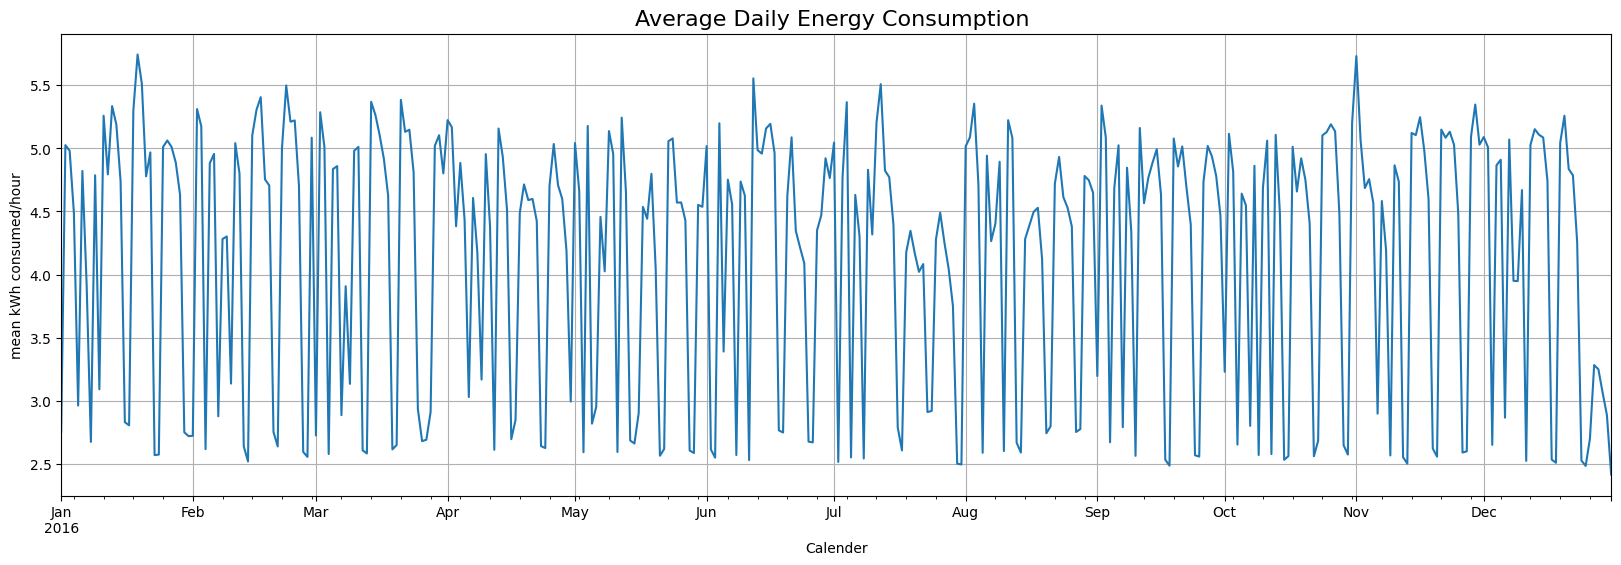

In [0]:
plt.figure()
daily_figure = daily_consumption_df.plot(figsize=(20,6))
plt.title('Average Daily Energy Consumption ',fontsize = 16)
plt.grid()
plt.ylabel('mean kWh consumed/hour')
plt.xlabel('Calender')
plt.show()

In [0]:
monthly_consumption_df = df1['Electricity Consumed [kWh]'].resample('M').mean()
monthly_consumption_df.describe()

count    12.000000
mean      4.139803
std       0.118338
min       3.951240
25%       4.059520
50%       4.175505
75%       4.213186
max       4.314917
Name: Electricity Consumed [kWh], dtype: float64

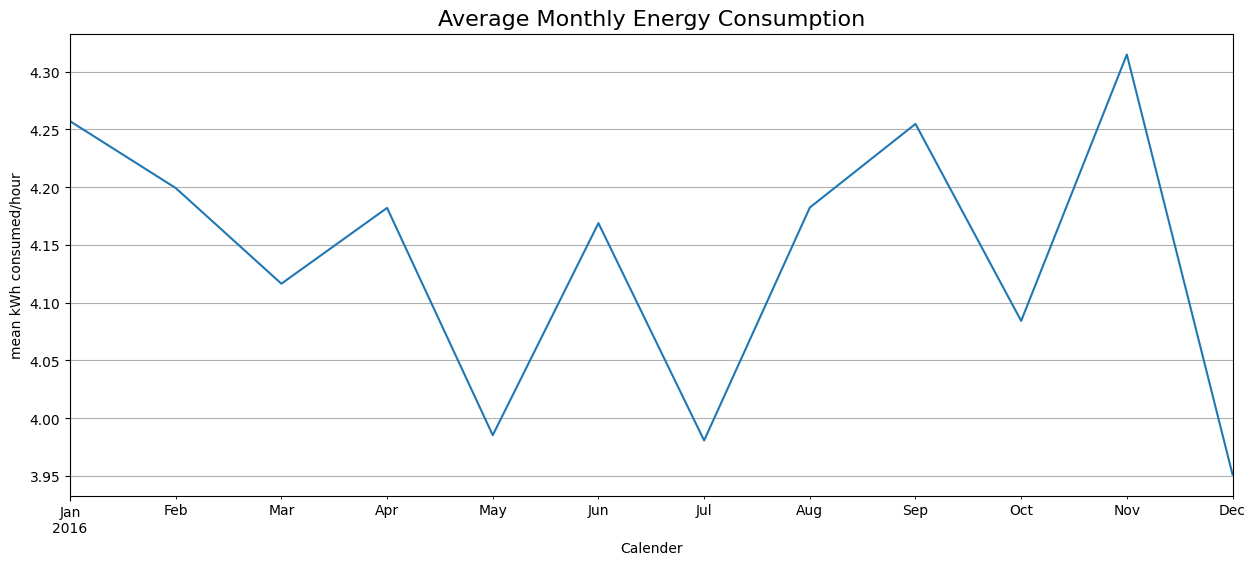

In [0]:
plt.figure()
monthly_figure = monthly_consumption_df.plot(figsize=(15,6))
plt.title('Average Monthly Energy Consumption',fontsize = 16)
plt.grid()
plt.ylabel('mean kWh consumed/hour')
plt.xlabel('Calender')
plt.show()

In [0]:
quarterly_consumption_df = df1['Electricity Consumed [kWh]'].resample('Q').mean()
quarterly_consumption_df.describe()

count    4.000000
mean     4.138561
std      0.036880
min      4.110711
25%      4.113659
50%      4.126349
75%      4.151251
max      4.190833
Name: Electricity Consumed [kWh], dtype: float64

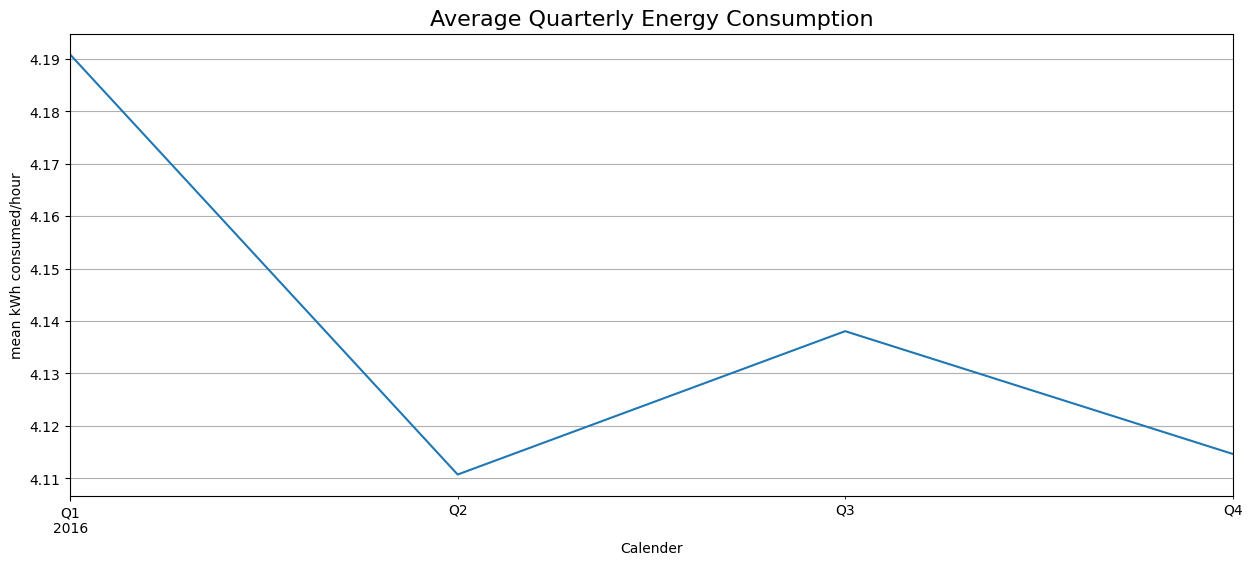

In [0]:
plt.figure()
quarterly_figure = quarterly_consumption_df.plot(figsize=(15,6))
plt.title('Average Quarterly Energy Consumption',fontsize = 16)
plt.ylabel('mean kWh consumed/hour')
plt.xlabel('Calender')
plt.grid()
plt.show()

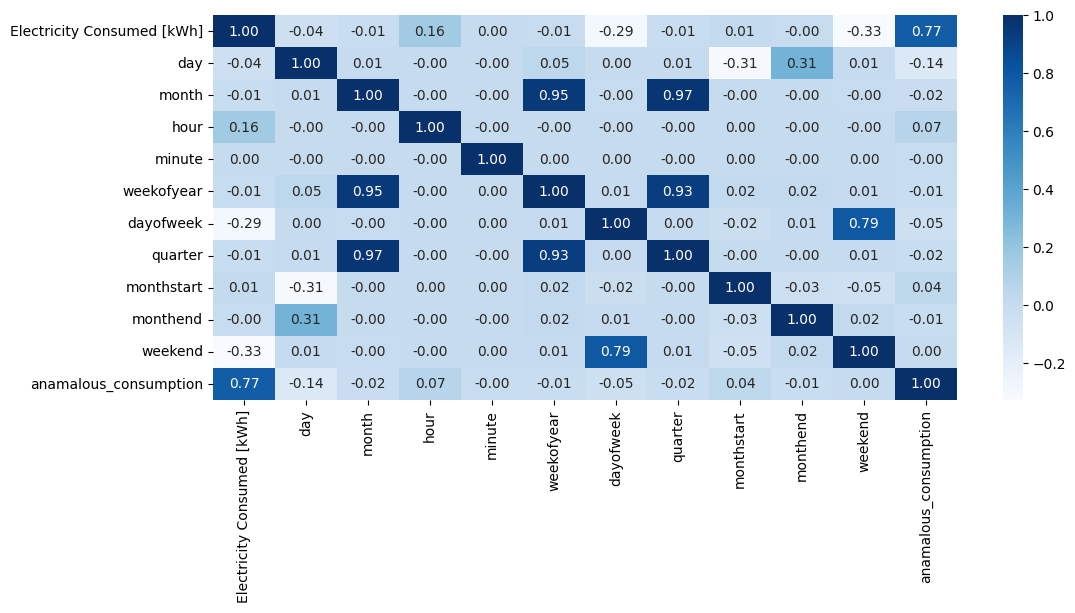

In [0]:
plt.figure(figsize=(12,5))
sns.heatmap(df1.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [0]:
# Drop 'Timestamp' : Not needed for Building Model
# Drop 'weekofyear' and 'quarter': These features are in correlation with other features. Hence, Dropping them.

df1 = df1.reset_index('Timestamp')
df1.drop(['Timestamp','weekofyear','quarter'],axis=1,inplace=True)
df1.head(5)

,Electricity Consumed [kWh],day,month,hour,minute,dayofweek,monthstart,monthend,weekend,anamalous_consumption
0,2.85,1,1,0,15,4,1,0,0,0
1,2.85,1,1,0,30,4,1,0,0,0
2,3.00,1,1,0,45,4,1,0,0,0
3,2.94,1,1,1,0,4,1,0,0,0
4,2.79,1,1,1,15,4,1,0,0,0


In [0]:
    # Copy all the predictor variables into X dataframe
    X = df1.drop(['anamalous_consumption'],axis=1) 
    # Copy target into the y dataframe. 
    y = df1[['anamalous_consumption']]    
    X.shape,y.shape

((35134, 9), (35134, 1))

In [0]:
from sklearn.model_selection import train_test_split
# splitting data into training and test set for independent attributes
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1) 

In [0]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [0]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
#from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
dt = DecisionTreeClassifier()
hyper_dt=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=3,min_samples_split=15,random_state=1)
rf = RandomForestClassifier()
hyper_rf=RandomForestClassifier(max_depth=5,max_features='auto',min_samples_leaf=3,min_samples_split=15,n_estimators=200)

mlp = MLPClassifier()
knn = KNeighborsClassifier()
hyper_knn=KNeighborsClassifier(metric='manhattan',n_neighbors=9,weights='distance')
gb = GradientBoostingClassifier()
logr = LogisticRegression()
lda = LinearDiscriminantAnalysis() 

In [0]:
#models = [dt,rf,mlp,knn,gb,logr,lda,hyper_dt,hyper_knn]
models = [dt,rf,mlp,knn,gb,logr,lda,hyper_dt,hyper_rf,hyper_knn]
scores_train=[]
scores_test=[]
time_taken=[]

In [0]:
import time

In [0]:
for i in models:  
    if (i == dt or i == rf or i == hyper_dt or i == hyper_rf) :
        start = time.time()
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        end = time.time()
        diff = end - start
        time_taken.append(diff)
        print("model trained : ",i)
        print("time taken: ",diff)       
    else :
        start = time.time()
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        end = time.time()
        diff = end - start
        time_taken.append(diff)
        print("model trained on scaled df: ",i)
        print("time taken: ",diff)

model trained :  DecisionTreeClassifier()
time taken:  5.866067886352539


/databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_sklearn.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  original_result = original(self, *args, **kwargs)


model trained :  RandomForestClassifier()
time taken:  6.259429454803467


/databricks/python/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model trained on scaled df:  MLPClassifier()
time taken:  43.45766067504883


/databricks/python/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/databricks/python/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/databricks/python/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default be

model trained on scaled df:  KNeighborsClassifier()
time taken:  11.159756660461426


/databricks/python/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model trained on scaled df:  GradientBoostingClassifier()
time taken:  6.634546756744385


/databricks/python/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/databricks/python/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model trained on scaled df:  LogisticRegression()
time taken:  4.202075481414795


/databricks/python/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model trained on scaled df:  LinearDiscriminantAnalysis()
time taken:  4.284400463104248
model trained :  DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=15,
                       random_state=1)
time taken:  3.7048332691192627


/databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_sklearn.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  original_result = original(self, *args, **kwargs)
/databricks/python/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


model trained :  RandomForestClassifier(max_depth=5, max_features='auto', min_samples_leaf=3,
                       min_samples_split=15, n_estimators=200)
time taken:  8.73182463645935


/databricks/python/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


model trained on scaled df:  KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')
time taken:  11.834193468093872


In [0]:
print(pd.DataFrame({'Training Accuracy':scores_train,'Test Accuracy': scores_test,'Time_taken':time_taken},
            index=['dt','rf','mlp','knn','gb','logr','lda','hyper_dt','hyper_rf','hyper_knn']))

           Training Accuracy  Test Accuracy  Time_taken
dt                  1.000000       1.000000    5.866068
rf                  1.000000       1.000000    6.259429
mlp                 0.976625       0.972677   43.457661
knn                 0.970683       0.947346   11.159757
gb                  1.000000       1.000000    6.634547
logr                0.989149       0.989896    4.202075
lda                 0.925890       0.925573    4.284400
hyper_dt            1.000000       1.000000    3.704833
hyper_rf            1.000000       1.000000    8.731825
hyper_knn           1.000000       0.966984   11.834193


In [0]:
for i in models:  
    if (i == dt or i == rf or i == hyper_dt or i == hyper_rf) :
        ytrain_predict = i.predict(x_train)
        ytest_predict = i.predict(x_test)
        print('Model:',i,'Classification Report of the training data:\n\n',metrics.classification_report(y_train, ytrain_predict),'\n')
        print('Model:',i,'Classification Report of the test data:\n\n',metrics.classification_report(y_test, ytest_predict),'\n')       
    else :
        ytrain_predict = i.predict(x_train_scaled)
        ytest_predict = i.predict(x_test_scaled)
        print('Model:',i,'Classification Report of the training data:\n\n',metrics.classification_report(y_train, ytrain_predict),'\n')
        print('Model:',i,'Classification Report of the test data:\n\n',metrics.classification_report(y_test, ytest_predict),'\n')
#print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, ytrain_predict),'\n')
#print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, ytest_predict),'\n')

Model: DecisionTreeClassifier() Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21040
           1       1.00      1.00      1.00      7067

    accuracy                           1.00     28107
   macro avg       1.00      1.00      1.00     28107
weighted avg       1.00      1.00      1.00     28107
 

Model: DecisionTreeClassifier() Classification Report of the test data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5244
           1       1.00      1.00      1.00      1783

    accuracy                           1.00      7027
   macro avg       1.00      1.00      1.00      7027
weighted avg       1.00      1.00      1.00      7027
 

Model: RandomForestClassifier() Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21040
   

/databricks/python/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

Model: KNeighborsClassifier() Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      1.00      0.86     21040
           1       0.00      0.00      0.00      7067

    accuracy                           0.75     28107
   macro avg       0.37      0.50      0.43     28107
weighted avg       0.56      0.75      0.64     28107
 

Model: KNeighborsClassifier() Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.75      1.00      0.85      5244
           1       0.00      0.00      0.00      1783

    accuracy                           0.75      7027
   macro avg       0.37      0.50      0.43      7027
weighted avg       0.56      0.75      0.64      7027
 

Model: GradientBoostingClassifier() Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      1.00      0.86     21040
   

/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.10/site-p

Model: GradientBoostingClassifier() Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.75      1.00      0.85      5244
           1       0.00      0.00      0.00      1783

    accuracy                           0.75      7027
   macro avg       0.37      0.50      0.43      7027
weighted avg       0.56      0.75      0.64      7027
 

Model: LogisticRegression() Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      1.00      0.86     21040
           1       1.00      0.07      0.12      7067

    accuracy                           0.77     28107
   macro avg       0.88      0.53      0.49     28107
weighted avg       0.82      0.77      0.68     28107
 

Model: LogisticRegression() Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      1.00      0.86      5244
           

/databricks/python/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Model: KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance') Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      1.00      0.86     21040
           1       0.00      0.00      0.00      7067

    accuracy                           0.75     28107
   macro avg       0.37      0.50      0.43     28107
weighted avg       0.56      0.75      0.64     28107
 

Model: KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance') Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.75      1.00      0.85      5244
           1       0.00      0.00      0.00      1783

    accuracy                           0.75      7027
   macro avg       0.37      0.50      0.43      7027
weighted avg       0.56      0.75      0.64      7027
 



/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/databricks/python/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


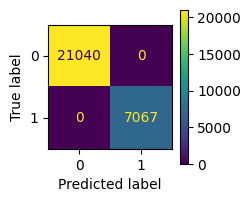

In [0]:
# Confusion matrix on the train data
model=hyper_dt
model.fit(x_train,y_train)
fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(model,x_train,y_train,ax=ax)

/databricks/python/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


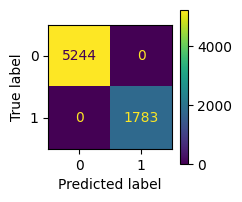

In [0]:
# Confusion matrix on the test data
fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(model,x_test,y_test,ax=ax)

In [0]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {'criterion' : ['gini'],
#    'max_depth': [5,10,15,20,25],
#    'min_samples_leaf': [3,15,30], 
#    'min_samples_split': [15,30,35,40,50]
#}
#hyper_dt = DecisionTreeClassifier()
#grid_search = GridSearchCV(estimator = hyper_dt, param_grid = param_grid, cv = 5,verbose=1)
#grid_search.fit(x_train,y_train)
#print(grid_search.best_params_)

In [0]:
#param_grid = {
#    'max_depth': [5,10,15,20],
#    'max_features': ['auto', 'sqrt'],
#    'min_samples_leaf': [3,15,30],
#    'min_samples_split': [15,30,45],
#    'n_estimators': [100,200]
#}

#hyper_rf = RandomForestClassifier()

#grid_search = GridSearchCV(estimator = hyper_rf , param_grid = param_grid, cv = 3,verbose=1)

#grid_search.fit(x_train,y_train)
#print(grid_search.best_params_)

In [0]:
#param_grid = {
#    'n_neighbors':[2,3,4,5,6,7,8,9,10],
#    'weights' : ['uniform','distance'],
#    'metric' : ['minkowski','euclidean','manhattan'],
#}
#
#hyper_knn =KNeighborsClassifier()
#
#grid_search = GridSearchCV(estimator = hyper_knn, param_grid = param_grid, cv = 5,verbose=1)

#grid_search.fit(x_train_scaled,y_train)

#print(grid_search.best_params_)

<Figure size 600x500 with 0 Axes>

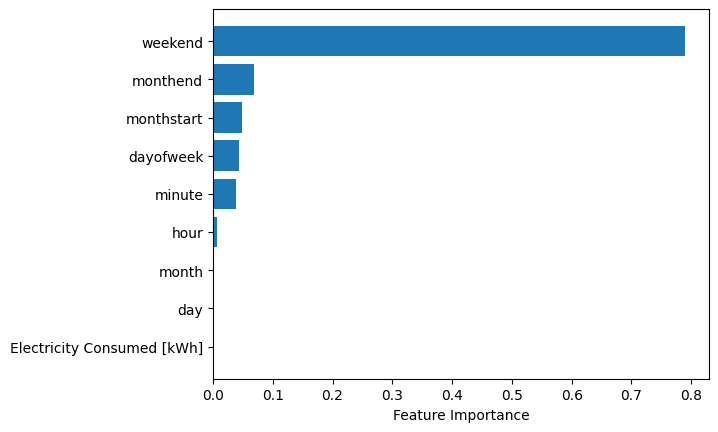

<Figure size 600x500 with 0 Axes>

In [0]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(x_train.columns,rf.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")
plt.figure(figsize=(6,5))

In [0]:
df2 = pd.read_csv("/dbfs/FileStore/shared_uploads/vijaykailash.sankaranaray@wipro.com/2__Consumable_Energy_Surge_Detection_Data___Validation.csv")
df2.shape

(8606, 2)

In [0]:
df2.head()

,Date Time,Electricity Consumed [kWh]
0,01-01-17 0:00,2.40
1,01-01-17 0:15,2.43
2,01-01-17 0:30,2.43
3,01-01-17 0:45,2.43
4,01-01-17 1:00,2.43


In [0]:
df2.isna().sum()

Date Time                     0
Electricity Consumed [kWh]    0
dtype: int64

In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8606 entries, 0 to 8605
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date Time                   8606 non-null   object 
 1   Electricity Consumed [kWh]  8606 non-null   float64
dtypes: float64(1), object(1)
memory usage: 134.6+ KB


In [0]:
df2['Timestamp']=pd.to_datetime(df2['Date Time'])

In [0]:
df2['day'] = pd.DatetimeIndex(df2['Timestamp']).day
df2['month'] = pd.DatetimeIndex(df2['Timestamp']).month
df2['hour'] = pd.DatetimeIndex(df2['Timestamp']).hour
df2['minute'] = pd.DatetimeIndex(df2['Timestamp']).minute

df2['monthstart'] = pd.DatetimeIndex(df2['Timestamp']).is_month_start
df2['monthend'] = pd.DatetimeIndex(df2['Timestamp']).is_month_end
df2['dayofweek'] = pd.DatetimeIndex(df2['Timestamp']).dayofweek

df2['weekofyear'] = pd.DatetimeIndex(df2['Timestamp']).weekofyear
# https://en.wikipedia.org/wiki/ISO_week_date#First_week
df2['quarter'] = pd.DatetimeIndex(df2['Timestamp']).quarter

<command-1406865997099826>:10: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df2['weekofyear'] = pd.DatetimeIndex(df2['Timestamp']).weekofyear


In [0]:
df2.monthstart = df2.monthstart.replace({True: 1, False: 0})
df2.monthend = df2.monthend.replace({True: 1, False: 0})

In [0]:
# Categorize the energy consumption based on weekday and weekend 
#1 Check for energy consumption on weekday
#2 Check for energy consumption on weekend

In [0]:
df2['weekend']=np.zeros(len(df2))
df2['weekend'] = df2['weekend'].astype('int64')

df2['weekend'][(df2['dayofweek']==5)|(df2['dayofweek']==6)]=1

<command-1406865997099829>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['weekend'][(df2['dayofweek']==5)|(df2['dayofweek']==6)]=1


In [0]:
#for date,name in sorted(holidays.IND(years=2017).items()):
#   print(date,name)

In [0]:
validation_file_backup = df2[['Date Time','Electricity Consumed [kWh]','weekend']]
validation_file_backup

,Date Time,Electricity Consumed [kWh],weekend
0,01-01-17 0:00,2.40,1
1,01-01-17 0:15,2.43,1
2,01-01-17 0:30,2.43,1
3,01-01-17 0:45,2.43,1
4,01-01-17 1:00,2.43,1
...,...,...,...
8601,31-03-17 22:45,3.09,0
8602,31-03-17 23:00,3.06,0
8603,31-03-17 23:15,3.12,0
8604,31-03-17 23:30,3.00,0


In [0]:
# Setting values for this "actual_anamalous_consumption"  will be used for Validation against "predicted_anamalous_consumption" 

validation_file_backup['actual_anamalous_consumption']=np.zeros(len(df2))
validation_file_backup['actual_anamalous_consumption'] = validation_file_backup['actual_anamalous_consumption'].astype('int64')

validation_file_backup['actual_anamalous_consumption']=np.where((validation_file_backup['Electricity Consumed [kWh]'] >= Weekday_Consumption_Q3) & (validation_file_backup['weekend'] == 0), 1 ,validation_file_backup['actual_anamalous_consumption'])

validation_file_backup['actual_anamalous_consumption']=np.where((validation_file_backup['Electricity Consumed [kWh]'] >= Weekend_Consumption_Q3) & (validation_file_backup['weekend'] == 1), 1 ,validation_file_backup['actual_anamalous_consumption'])

validation_actual_consumption=validation_file_backup['actual_anamalous_consumption']

<command-1406865997100825>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_file_backup['actual_anamalous_consumption']=np.zeros(len(df2))
<command-1406865997100825>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_file_backup['actual_anamalous_consumption'] = validation_file_backup['actual_anamalous_consumption'].astype('int64')
<command-1406865997100825>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [0]:
df2

,Date Time,Electricity Consumed [kWh],Timestamp,day,month,hour,minute,monthstart,monthend,dayofweek,weekofyear,quarter,weekend
0,01-01-17 0:00,2.40,2017-01-01 00:00:00,1,1,0,0,1,0,6,52,1,1
1,01-01-17 0:15,2.43,2017-01-01 00:15:00,1,1,0,15,1,0,6,52,1,1
2,01-01-17 0:30,2.43,2017-01-01 00:30:00,1,1,0,30,1,0,6,52,1,1
3,01-01-17 0:45,2.43,2017-01-01 00:45:00,1,1,0,45,1,0,6,52,1,1
4,01-01-17 1:00,2.43,2017-01-01 01:00:00,1,1,1,0,1,0,6,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8601,31-03-17 22:45,3.09,2017-03-31 22:45:00,31,3,22,45,0,1,4,13,1,0
8602,31-03-17 23:00,3.06,2017-03-31 23:00:00,31,3,23,0,0,1,4,13,1,0
8603,31-03-17 23:15,3.12,2017-03-31 23:15:00,31,3,23,15,0,1,4,13,1,0
8604,31-03-17 23:30,3.00,2017-03-31 23:30:00,31,3,23,30,0,1,4,13,1,0


In [0]:
#df1 = df1.set_index('Date/Time')

df2.drop(['Date Time'],axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8606 entries, 0 to 8605
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Electricity Consumed [kWh]  8606 non-null   float64       
 1   Timestamp                   8606 non-null   datetime64[ns]
 2   day                         8606 non-null   int64         
 3   month                       8606 non-null   int64         
 4   hour                        8606 non-null   int64         
 5   minute                      8606 non-null   int64         
 6   monthstart                  8606 non-null   int64         
 7   monthend                    8606 non-null   int64         
 8   dayofweek                   8606 non-null   int64         
 9   weekofyear                  8606 non-null   int64         
 10  quarter                     8606 non-null   int64         
 11  weekend                     8606 non-null   int64       

In [0]:
df2.drop(['Timestamp','weekofyear','quarter'],axis=1,inplace=True)

In [0]:
## Based on Model Performance in the Training phase, Evaluate the chosen models on the Validation Dataframe
models_validation = [hyper_dt,hyper_rf]

In [0]:
ss=StandardScaler() 
x_scaled=ss.fit_transform(X)
df2_scaled=ss.transform(df2)

/databricks/python/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [0]:
for i in models_validation:  
    if ( i == hyper_dt or i == hyper_rf) :
        start = time.time()
        i.fit(X,y)
        pred_test=i.predict(df2)
        end = time.time()
        diff = end - start
        print("model: ",i)
        print("time taken: ",diff)       
    else :
        start = time.time() 
        i.fit(x_scaled,y)
        pred_test_scaled=i.predict(df2_scaled)
        end = time.time()
        diff = end - start
        print("model on scaled dataframe: ",i)
        print("time taken: ",diff)

/databricks/python/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_sklearn.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  original_result = original(self, *args, **kwargs)
/databricks/python/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


model:  DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=15,
                       random_state=1)
time taken:  4.022791147232056
model:  RandomForestClassifier(max_depth=5, max_features='auto', min_samples_leaf=3,
                       min_samples_split=15, n_estimators=200)
time taken:  7.510982036590576


/databricks/python/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [0]:
#models = [dt,rf,mlp,knn,gb,logr,hyper_dt,hyper_knn]
predicted_hyper_dt= hyper_dt.predict(df2)
predicted_hyper_knn= hyper_knn.predict(df2_scaled)
predicted_hyper_rf= hyper_rf.predict(df2)

/databricks/python/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/databricks/python/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [0]:
confusion_matrix(validation_actual_consumption, predicted_hyper_dt)

array([[5973,    0],
       [   0, 2633]])

In [0]:
confusion_matrix(validation_actual_consumption, predicted_hyper_knn)

array([[5973,    0],
       [2633,    0]])

In [0]:
confusion_matrix(validation_actual_consumption, predicted_hyper_rf)

array([[5973,    0],
       [ 459, 2174]])

In [0]:
df_predicted_file_energy  = pd.DataFrame(predicted_hyper_dt, columns =['Prediction']) 

In [0]:
validation_file_backup.actual_anamalous_consumption.value_counts(normalize=True)

0    0.694051
1    0.305949
Name: actual_anamalous_consumption, dtype: float64

In [0]:
df_predicted_file_energy.Prediction.value_counts(normalize=True)

0    0.694051
1    0.305949
Name: Prediction, dtype: float64

In [0]:
df_result=pd.concat([validation_file_backup.reset_index(drop=True),df_predicted_file_energy.reset_index(drop=True)],axis=1)

In [0]:
df_result.drop(['weekend'],axis=1,inplace=True)

In [0]:
df_result

,Date Time,Electricity Consumed [kWh],actual_anamalous_consumption,Prediction
0,01-01-17 0:00,2.40,0,0
1,01-01-17 0:15,2.43,0,0
2,01-01-17 0:30,2.43,0,0
3,01-01-17 0:45,2.43,0,0
4,01-01-17 1:00,2.43,0,0
...,...,...,...,...
8601,31-03-17 22:45,3.09,0,0
8602,31-03-17 23:00,3.06,0,0
8603,31-03-17 23:15,3.12,0,0
8604,31-03-17 23:30,3.00,0,0


In [0]:
df_result.to_csv("/Workspace/Users/vijaykailash.sankaranaray@wipro.com/result_classification_anamalous_consumption.csv",index=False)

**End**